In [13]:
#!/usr/bin/env python
# coding: utf-8

# # Model Architecture Description

# The baseline model is a simple feed forward neural network,which consists of four layers:
# 
# Embedding Layer: The first layer is an Embedding layer, which is used to convert each word in our input sequences
# into dense vectors of fixed size, effectively creating a word embedding. This specific embedding layer transforms an
# input vocabulary of max_features unique words into embedding_dim-dimensional vectors (in this case, 100 dimensions),
# for input sequences of length maxlen.
# 
# Flatten Layer: Following the Embedding layer, a Flatten layer is used to transform the output from 2D to 1D.
# This layer does not have any parameters; it only changes the shape of the input, and is necessary to connect the
# Embedding layer with the Dense layer that follows.
# 
# Dense Layer: The third layer is a Dense layer (fully connected layer) with 32 neurons and a Rectified Linear Unit (ReLU) 
# activation function. It transforms the flattened input by applying a linear transformation and then a ReLU activation,
# which adds non-linearity to the model.
# 
# Output Layer: The final layer is another Dense layer with a single neuron, used for binary classification.
# It uses a sigmoid activation function, which transforms its input into a value between 0 and 1. This can be interpreted 
# as the model's confidence that the input sentence is positive (in the context of binary classification).

# In[23]:


import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping





In [3]:
df = pd.read_csv(r'C:\Users\HP\Downloads\py\depression_dataset_reddit_cleaned.csv')



In [4]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [8]:
total_rows = len(df)
print("Total Rows:", total_rows)


Total Rows: 7731


In [5]:
max_features =18611
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])



In [6]:
maxlen = 1844
data = pad_sequences(sequences, maxlen=maxlen)



In [7]:

labels = np.array(df['is_depression'])


In [14]:
history=X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)



In [15]:

embedding_dim = 100
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [18]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:

# history=model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test))


# Fit the model with early stopping
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
97/97 [==============================] - 16s 154ms/step - loss: 0.4849 - accuracy: 0.8011 - val_loss: 0.2654 - val_accuracy: 0.8901
Epoch 2/30
97/97 [==============================] - 19s 200ms/step - loss: 0.1663 - accuracy: 0.9426 - val_loss: 0.1219 - val_accuracy: 0.9586
Epoch 3/30
97/97 [==============================] - 23s 236ms/step - loss: 0.0638 - accuracy: 0.9824 - val_loss: 0.0995 - val_accuracy: 0.9670
Epoch 4/30
97/97 [==============================] - 20s 209ms/step - loss: 0.0340 - accuracy: 0.9913 - val_loss: 0.1024 - val_accuracy: 0.9651
Epoch 5/30
97/97 [==============================] - 22s 232ms/step - loss: 0.0203 - accuracy: 0.9951 - val_loss: 0.1039 - val_accuracy: 0.9632
Epoch 6/30
97/97 [==============================] - 18s 181ms/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.1071 - val_accuracy: 0.9651


In [20]:
import matplotlib.pyplot as plt

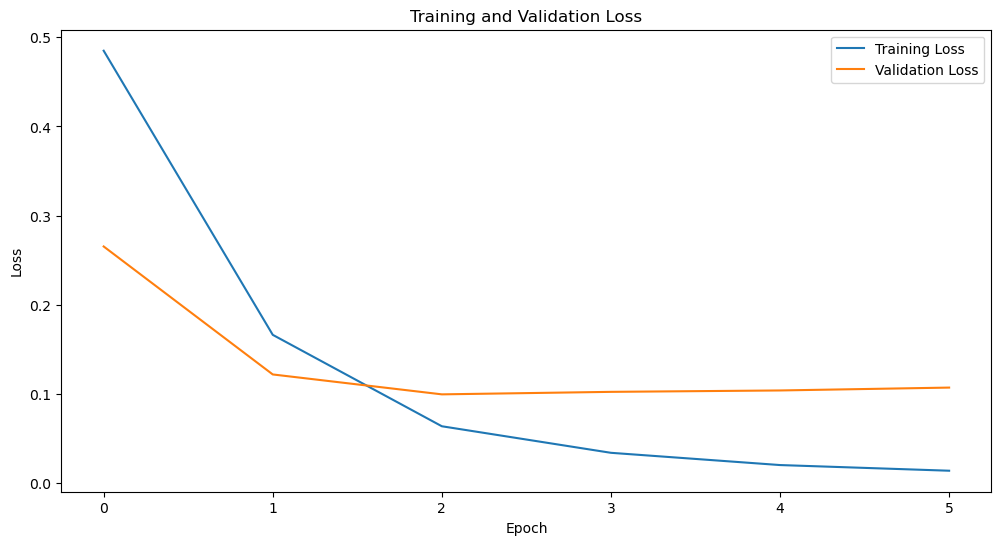

In [21]:
# Assuming that 'history' is the output of the fit method
# history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# Plotting loss
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

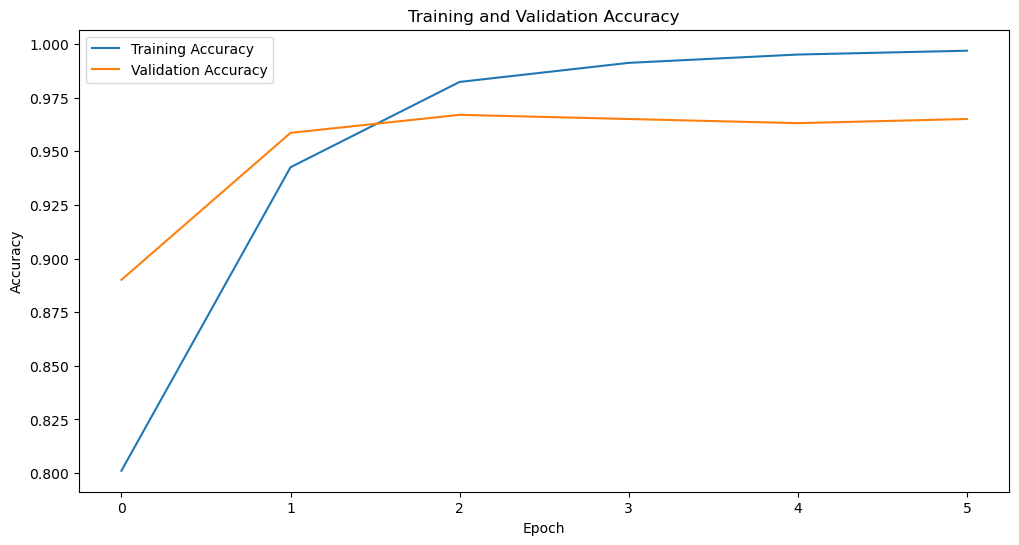

In [22]:
# Plotting accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:

y_pred = model.predict(X_test)



49/49 [==============================] - 1s 20ms/step


In [27]:
print(y_pred)

[[0.99995184]
 [0.02571093]
 [0.10146032]
 ...
 [0.9656643 ]
 [0.01803089]
 [0.14046657]]


In [28]:
# Assuming a threshold of 0.5
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Print the binary predictions
print("Binary Predictions:")
print(y_pred_binary)

Binary Predictions:
[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [30]:
report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       767
           1       0.99      0.95      0.97       780

    accuracy                           0.97      1547
   macro avg       0.97      0.97      0.97      1547
weighted avg       0.97      0.97      0.97      1547



# Precision:
**Interpretation: In the context of depression detection, precision would answer the question:**
**"Of all the instances predicted as depression, how many actually have depression?" 
 A high precision indicates that the model is 
 accurate when it predicts positive cases**

# Recall: 

**In the context of depression detection, recall would answer the question: "Of all the instances that actually
    have depression, how many did the model correctly identify?"
    A high recall indicates that the model is sensitive to identifying positive cases.**
    
**These values indicate that your model has a high precision (when it predicts depression, it is often correct), 
and it has a high recall (it identifies a high proportion of actual depression cases). This is a good balance, and
the F1-score, which is not explicitly shown, is likely to be high as well.**

**In the context of depression detection, both precision and recall are crucial. However, the relative importance depends
on the specific goals and requirements of the application. If false positives (incorrectly predicting depression) are 
costly or have negative consequences, high precision is important. If missing actual cases of depression (false negatives)
is a significant concern, high recall is important. The right balance depends on the specific use case and the impact of
false positives and false negatives.**

In [34]:
from sklearn.metrics import confusion_matrix


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [40]:
cm = confusion_matrix(y_test, y_pred_binary)



In [41]:
class_labels = np.unique(y_test)

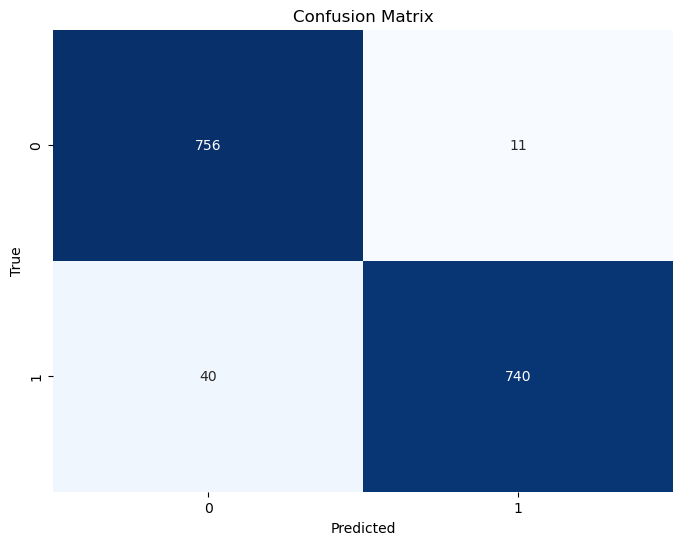

In [42]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()